<a href="https://colab.research.google.com/github/Airee66/MAT421/blob/main/ModuleG_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 21: Numerical Integration
### Ainsley Chapman
### Date: 3/26/2023

## Section 21.4 - Simpson’s Rule

Simpson’s Rule approximates the area under 𝑓(𝑥) by fitting quadratic polynomials between points and then integrating.

$$ \int_a^b f(x) dx \approx \frac{h}{3} \left[f(x_0)+4 \left(\sum_{i=1, i\  {\text{odd}}}^{n-1}f(x_i)\right)+2 \left(\sum_{i=2, i\  {\text{even}}}^{n-2}f(x_i)\right)+f(x_n)\right]$$

In [1]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

2.0001095173150043
-0.00010951731500430384


## Section 21.5 - Computing Integrals in Python

### Trapezoid Function in Python

Evaluating $\int_0^{\pi/2} cos(x) $

In [2]:
from scipy.integrate import trapz
#cos(x) integrated over 0 to pi/2
a = 0
b = np.pi/2
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.cos(x)

I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

0.9979429863543572
0.9979429863543573


### Quadratic Function in Python
Evaluating $\int_0^{\pi/2} cos(x) $

In [6]:
#cos(x) integrated over 0 to pi/2
from scipy.integrate import quad 

I_quad, est_err_quad = \
          quad(np.cos, 0, np.pi/2)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

0.9999999999999999
1.1102230246251564e-14 1.0


Both of the python funciton above approximate the integral of $cos(x)$ from $0$ to $\pi/2$.  They produce slightly different results but are still very close to the exact result of $1$.

### Cumulative integral using trapezoid rule

<ipython-input-5-8c283b78e9ef>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


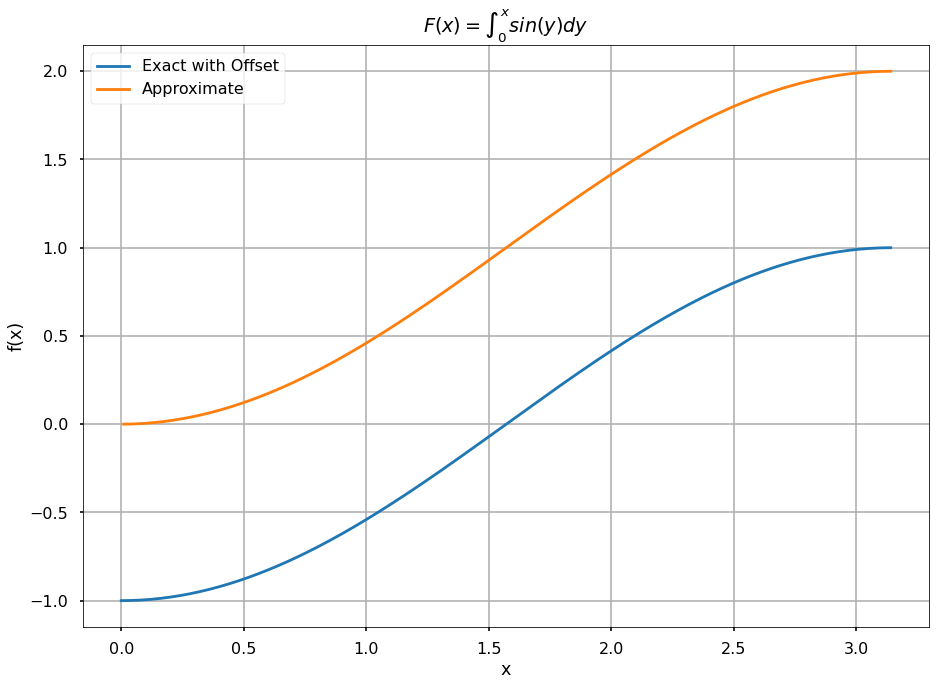

In [5]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x)

#plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approximate'])
plt.show()